# Lending Club Case Study

<h3>Importing Libs</h3>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h3> Loading Data </h3>

In [120]:
dataset_path = os.path.join('loan', 'loan.csv')
df = pd.read_csv(dataset_path)
df.head()

C:\Users\rezon760779\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


<h3>Dataset size</h3>

In [3]:
df.shape

(39717, 111)

<h3> Checking Null Values Count On Each Columns</h3>

In [87]:
null_counts = df.isnull().sum()
null_counts

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

<h3>Removing All Columns which are completly Null</h3>

In [88]:
df = df.dropna(axis=1, how='all')
df.shape

(39717, 57)

<font color='red'>Out of 111 Columns, 54 Columns contains only null value</font><br>
<font color='red'>Removed 54 Columns Now we have 57 Columns left to Analysis</font>

<h4>Now Analysing Null Value Count of Remaning Columns</h4>

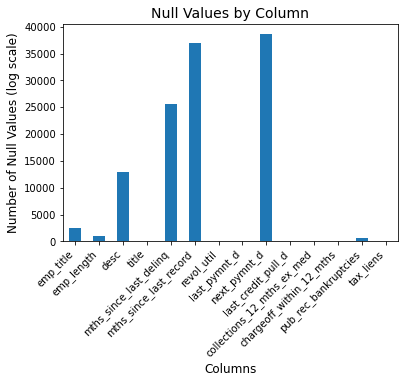

<Figure size 864x576 with 0 Axes>

In [6]:
# Count the null values in each column
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
# Create a bar plot
null_counts.plot(kind='bar')

# Customize the plot
plt.title('Null Values by Column', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Null Values (log scale)', fontsize=12)  # Update the y-label text
plt.xticks(rotation=45, ha='right', fontsize=10)

# Increase the size of the plot window
plt.figure(figsize=(12, 8))

# Display the plot
plt.tight_layout()
plt.show()

<h3>Removing below Columns as it not possible to fix Missing Values</h3>
    <br>
<b><font color="Blue">mths_since_last_delinq</font>&nbsp;</b> {The number of months since the borrower's last delinquency.} <br>
<b><font color="Blue">mths_since_last_record</font>&nbsp;</b> {The number of months since the last public record.}<br>
<b><font color="Blue">next_pymnt_d</font>&nbsp;</b>	{Next scheduled payment date}<br>

Also Removing <b><font color="Blue">desc</font>&nbsp;</b> as it can't be standardised<br>
<b><font color="Blue">desc</font>&nbsp;</b>	{Loan description provided by the borrower}<br>

In [89]:
columns_to_drop = ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'desc']
df = df.drop(columns=columns_to_drop)
df.shape



(39717, 53)

In [90]:
Final_columns = ['addr_state',
'annual_inc',
'collection_recovery_fee',
'delinq_2yrs',
'dti',
'earliest_cr_line',
'emp_length',
'funded_amnt',
'funded_amnt_inv',
'grade',
'home_ownership',
'initial_list_status',
'inq_last_6mths',
'installment',
'int_rate',
'issue_d',
'last_credit_pull_d',
'last_pymnt_amnt',
'last_pymnt_d',
'loan_amnt',
'loan_status',
'open_acc',
'out_prncp',
'out_prncp_inv',
'pub_rec',
'pub_rec_bankruptcies',
'purpose',
'recoveries',
'revol_bal',
'revol_util',
'sub_grade',
'term',
'total_acc',
'total_pymnt',
'total_pymnt_inv',
'total_rec_int',
'total_rec_late_fee',
'total_rec_prncp',
'verification_status']
df = df[Final_columns]
df.shape

(39717, 39)

<h6><font color='red'>Removed 4 columns now we left with 53 Columns</font></h6>

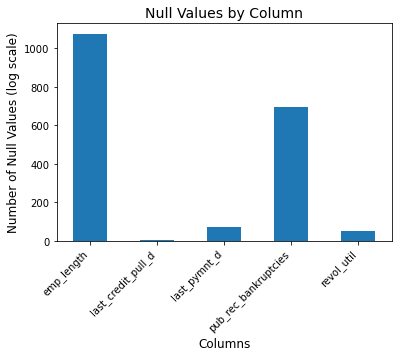

<Figure size 864x576 with 0 Axes>

In [9]:
# Count the null values in each column
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
# Create a bar plot
null_counts.plot(kind='bar')

# Customize the plot
plt.title('Null Values by Column', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Null Values (log scale)', fontsize=12)  # Update the y-label text
plt.xticks(rotation=45, ha='right', fontsize=10)

# Increase the size of the plot window
plt.figure(figsize=(12, 8))

# Display the plot
plt.tight_layout()
plt.show()

In [10]:
df.columns

Index(['addr_state', 'annual_inc', 'collection_recovery_fee', 'delinq_2yrs',
       'dti', 'earliest_cr_line', 'emp_length', 'funded_amnt',
       'funded_amnt_inv', 'grade', 'home_ownership', 'initial_list_status',
       'inq_last_6mths', 'installment', 'int_rate', 'issue_d',
       'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt',
       'loan_status', 'open_acc', 'out_prncp', 'out_prncp_inv', 'pub_rec',
       'pub_rec_bankruptcies', 'purpose', 'recoveries', 'revol_bal',
       'revol_util', 'sub_grade', 'term', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee',
       'total_rec_prncp', 'verification_status'],
      dtype='object')

In [91]:
#Check Missing Values in Rows
df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
39712    1
39713    1
39714    1
39715    1
39716    1
Length: 39717, dtype: int64

In [92]:
set(df['emp_length'])

{'1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year',
 nan}

In [93]:
#In emp_length there are nan values present, filling 'nan' with 0
df['emp_length'] = df['emp_length'].fillna(0)
set(df['emp_length'])

{0,
 '1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year'}

In [94]:
set(df['home_ownership'])

{'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT'}

In [95]:
#Remove Records which have None
df = df[df['home_ownership']!='NONE']
set(df['home_ownership'])

{'MORTGAGE', 'OTHER', 'OWN', 'RENT'}

In [96]:
df.shape

(39714, 39)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39714 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   addr_state               39714 non-null  object 
 1   annual_inc               39714 non-null  float64
 2   collection_recovery_fee  39714 non-null  float64
 3   delinq_2yrs              39714 non-null  int64  
 4   dti                      39714 non-null  float64
 5   earliest_cr_line         39714 non-null  object 
 6   emp_length               39714 non-null  object 
 7   funded_amnt              39714 non-null  int64  
 8   funded_amnt_inv          39714 non-null  float64
 9   grade                    39714 non-null  object 
 10  home_ownership           39714 non-null  object 
 11  initial_list_status      39714 non-null  object 
 12  inq_last_6mths           39714 non-null  int64  
 13  installment              39714 non-null  float64
 14  int_rate              

### Remove <b>`'%'`</b> sign from the values in the column `revol_util`

In [98]:
df= df[~df['revol_util'].isnull()]

In [99]:
df['revol_util'].isnull().sum()

0

In [100]:
df['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
4    53.90%
Name: revol_util, dtype: object

In [101]:
df['revol_util'] = df['revol_util'].str.rstrip('%')

In [102]:
df['revol_util'].head()

0    83.70
1     9.40
2    98.50
3       21
4    53.90
Name: revol_util, dtype: object

#### Segment the `revol_util` column into four categories

In [103]:
def revol_util_categories_func(x):
    x = float(x)
    if x <= 5:
        return "Extremely Good"
    elif (x > 5) & (x <= 30):
        return "Good"
    elif (x > 30) & (x <= 50):
        return "Moderate"
    elif (x > 50) & (x <= 70):
        return "Risky"
    elif x > 70:
        return "Extremely Risky"

In [104]:
df['revol_util_categories'] = df['revol_util'].apply(lambda x: revol_util_categories_func(x))

In [105]:
df.groupby('revol_util_categories').count()

,addr_state,annual_inc,collection_recovery_fee,delinq_2yrs,dti,earliest_cr_line,emp_length,funded_amnt,funded_amnt_inv,grade,...,revol_util,sub_grade,term,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,verification_status
revol_util_categories,,,,,,,,,,,,,,,,,,,,,
Extremely Good,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,...,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733
Extremely Risky,10891,10891,10891,10891,10891,10891,10891,10891,10891,10891,...,10891,10891,10891,10891,10891,10891,10891,10891,10891,10891
Good,8986,8986,8986,8986,8986,8986,8986,8986,8986,8986,...,8986,8986,8986,8986,8986,8986,8986,8986,8986,8986
Moderate,8464,8464,8464,8464,8464,8464,8464,8464,8464,8464,...,8464,8464,8464,8464,8464,8464,8464,8464,8464,8464
Risky,8590,8590,8590,8590,8590,8590,8590,8590,8590,8590,...,8590,8590,8590,8590,8590,8590,8590,8590,8590,8590


### Remove outliers from `Loan Amount` column

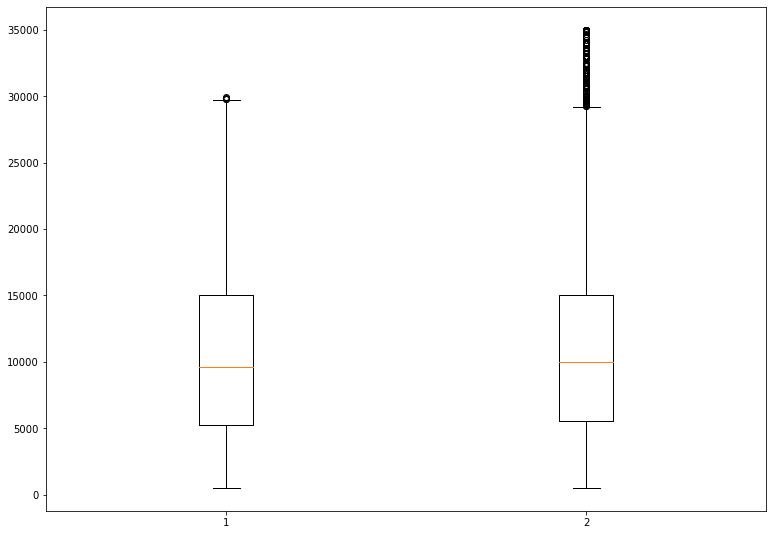

Number of outliers  (828, 40)


In [27]:
loan_amount_data = [df[df['loan_amnt'] < 30000].loan_amnt, df['loan_amnt']]
loan_amount_fig = plt.figure(figsize =(10, 7))
ax = loan_amount_fig.add_axes([0,0,1,1])
ax.boxplot(loan_amount_data)
plt.show()
print("Number of outliers ",df[df['loan_amnt'] > 30000].shape)

It is evident that the loan amount is ranged between <b>5000 and 15000</b> i.e the 1st quartile and the 3rd quartile respectively with an inter quartile range of <b>10000</b> and the maximum amount is closer to <b>30000</b> and the minimum loan amount is closer to <b>1000</b>. The box plot confirms that outliers are present for loan amount above <b>30000</b> that are <b>828 rows/loan accounts</b>.

In [106]:
print(df.shape)
df = df.drop(df[df['loan_amnt'] >= 30000].index)
print(df.shape)

(39664, 40)
(38459, 40)


### Remove outliers from `Annual Income` column

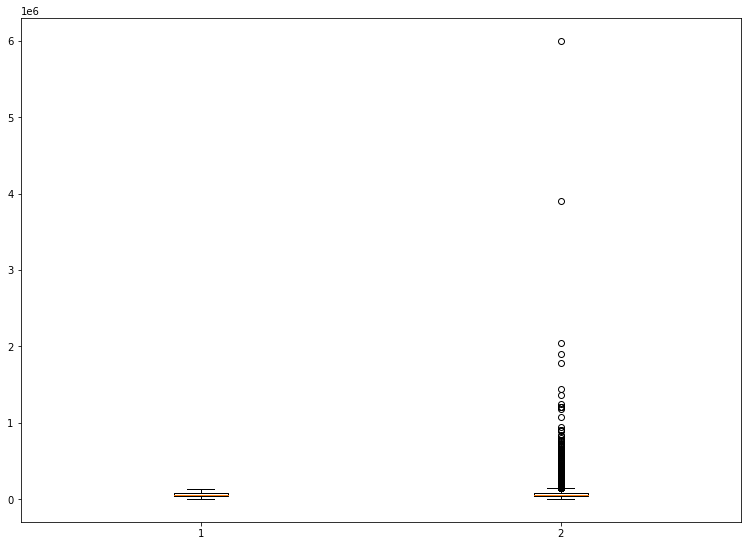

In [29]:
annual_income_data = [df[df['annual_inc'] < 127500].annual_inc, df['annual_inc']]
annual_income_fig = plt.figure(figsize =(10, 7))
ax = annual_income_fig.add_axes([0,0,1,1])
ax.boxplot(annual_income_data)
plt.show()

In [107]:
df = df.drop(df[df['annual_inc'] >= 127500].index)
print(df.shape)

(36039, 40)


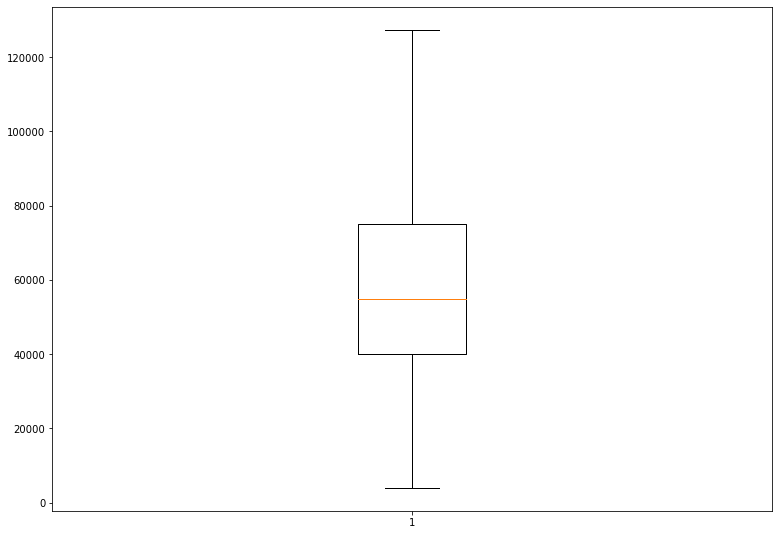

In [31]:
annual_income_data = df['annual_inc']
annual_income_fig = plt.figure(figsize =(10, 7))
ax = annual_income_fig.add_axes([0,0,1,1])
ax.boxplot(annual_income_data)
plt.show()

In [108]:
df['int_rate'] = pd.to_numeric(df['int_rate'].str.rstrip("%"))

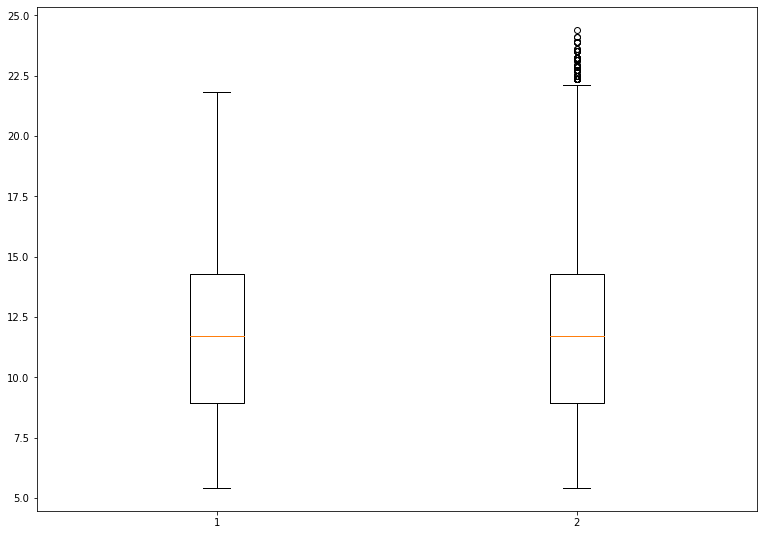

In [33]:
annual_income_data = [df[df['int_rate'] < 22 ].int_rate, df['int_rate']]
annual_income_fig = plt.figure(figsize =(10, 7))
ax = annual_income_fig.add_axes([0,0,1,1])
ax.boxplot(annual_income_data)
plt.show()

In [109]:
df = df.drop(df[df['int_rate'] > 22 ].index)
print(df.shape)

(35931, 40)


In [110]:
int_rate_bins = [0, 5, 10, 12.5, 15, 22]
int_rate_labels = ['0-5', '5-10', '10-12.5', '12.5-15', '15+']
df['int_rate'] = pd.to_numeric(df['int_rate'], errors='coerce')
# Creating a new column 'int_rate_catgs' based on the categorized interest rates
df['int_rate_catgs'] = pd.cut(df['int_rate'], bins=int_rate_bins, labels=int_rate_labels)

In [111]:
df['int_rate_catgs'].head()

0    10-12.5
1        15+
2        15+
3    12.5-15
4    12.5-15
Name: int_rate_catgs, dtype: category
Categories (5, object): ['0-5' < '5-10' < '10-12.5' < '12.5-15' < '15+']

## Univariate Analysis

#### Distribution of Revolving Credit Utilisation that is segmented into 5-categories.
-  <b>Extremely Good:</b> Revolving credit utilisation <b>less than 5%</b> of the available credit line.
-  <b>Good:</b> Revolving credit utilisation <b>between 5% and 30%</b> of the available credit line.
-  <b>Moderate:</b> Revolving credit utilisation <b>between 30% and 50%</b> of the available credit line.
-  <b>Risky:</b> Revolving credit utilisation <b>between 50% and 70%</b> of the available credit line.
-  <b>Extremely Risky:</b> Revolving credit utilisation <b>more than 7%</b> of the available credit line.

<AxesSubplot:>

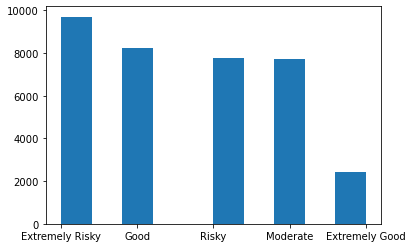

In [71]:
df['revol_util_categories'].hist(grid=False)

#### Analysis outcomes based on the distribution of `revol_util_categories` column
-  Based on the univariate analysis if `revol_util` variable, it can be see that the data set has a large distribution of borrower account having <b>`Extremely Risky`</b> credit utilisation and very few with <b>`Extremely Good`</b> credit utilisation.
-  It can be analysed that <b>Lending Club</b> provides most amount of loans to borrower having <b>70%+</b> revolving credit utilisation.
-  It can also be seen from the distribution of the data set that the second most borrowers of <b>Lending Club</b> have a <b>Good</b> credit utilisation (<b> i.e. revolving credit utlisation between 5% and 30% </b>)

<AxesSubplot:>

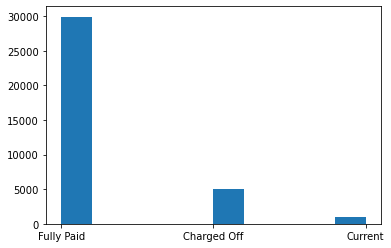

In [74]:
df['loan_status'].hist(grid=False)

#### Analysis outcomes based on the distribution of `loan_status` column
-  As per the distribution it can be summaried that the data set contains higher accounts having <b>Fully Paid</b> status.
-  As per the distribution of the data set there is a <b>significant</b> rise is accounts that are <b>Charged Off</b> than accounts having the <b>Current</b> status. Which could mean that the current account has a higher chance of being <b>Fully Paid</b>.

<h2>Bivariate Analysis</h2>

In [37]:
# Purpose of Loan against Chargedoff_Proportion.

# Grouping the data by 'purpose' and 'loan_status' to analyze the loan status distribution
purpose_vs_loan = df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,406.0,59.0,1092.0,1557.0,0.260758
10,renewable_energy,17.0,1.0,74.0,92.0,0.184783
3,educational,54.0,0.0,254.0,308.0,0.175325
8,moving,88.0,7.0,437.0,532.0,0.165414
9,other,580.0,110.0,3014.0,3704.0,0.156587
7,medical,98.0,6.0,523.0,627.0,0.156300
5,house,49.0,9.0,272.0,330.0,0.148485
2,debt_consolidation,2485.0,471.0,13981.0,16937.0,0.146720
12,vacation,51.0,5.0,306.0,362.0,0.140884
4,home_improvement,299.0,71.0,2084.0,2454.0,0.121842


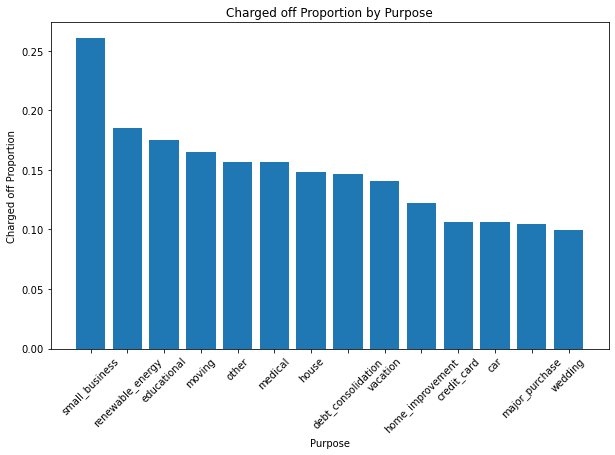

In [38]:
# Plotting the graph
# Sorting the dataframe by the proportion of charged off cases in descending order
purpose_vs_loan_sorted = purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(purpose_vs_loan_sorted['purpose'], purpose_vs_loan_sorted['Chargedoff_Proportion'])
plt.xlabel('Purpose')
plt.ylabel('Charged off Proportion')
plt.title('Charged off Proportion by Purpose')
plt.xticks(rotation=45)
plt.show()

<font color="Blue"><h4>Upon careful examination, it was observed that small business applicants face a significant risk of being charged off.</h4></font>
<font color="Blue"><h4>When analyzing the data, it becomes evident that the proportion of charged off cases is comparatively higher in the renewable energy category than in other categories.</h4>
</font>

In [39]:
#Conducting a bivariate analysis on the variable 'grade' in relation to the proportion of charged off cases.

grade_vs_loan = df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan_sorted = grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)
grade_vs_loan_sorted

loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,G,50.0,0.0,105.0,155.0,0.322581
5,F,229.0,38.0,506.0,773.0,0.296248
4,E,586.0,140.0,1585.0,2311.0,0.253570
3,D,1023.0,193.0,3579.0,4795.0,0.213347
2,C,1265.0,227.0,5931.0,7423.0,0.170416
1,B,1338.0,282.0,9399.0,11019.0,0.121427
0,A,584.0,39.0,8832.0,9455.0,0.061766


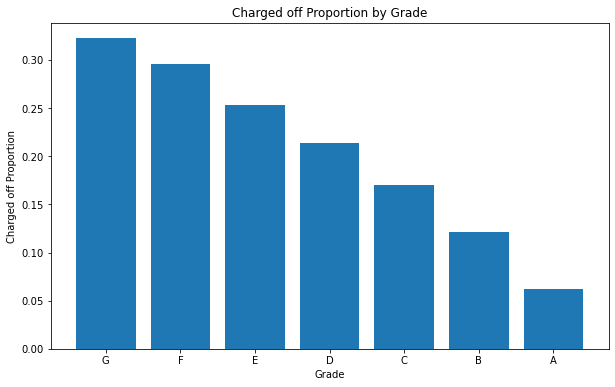

In [40]:
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(grade_vs_loan_sorted['grade'], grade_vs_loan_sorted['Chargedoff_Proportion'])
plt.xlabel('Grade')
plt.ylabel('Charged off Proportion')
plt.title('Charged off Proportion by Grade')
plt.show()

<h3>The analysis reveals the following observations: </h3><br>
<li>Grade 'A' shows a significantly low likelihood of being charged off.
<li>Grades 'F' and 'G' exhibit a considerably high likelihood of being charged off.
<li>The likelihood of charged off cases increases progressively from grade 'A' to grade 'G'.

In [41]:
#Conducting a bivariate analysis on the variable 'sub_grade' in relation to the proportion of charged off cases.

subgrade_vs_loan = df.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
subgrade_vs_loan['Total'] = subgrade_vs_loan['Charged Off'] + subgrade_vs_loan['Current'] + subgrade_vs_loan['Fully Paid']
subgrade_vs_loan['Chargedoff_Proportion'] = subgrade_vs_loan['Charged Off'] / subgrade_vs_loan['Total']
subgrade_vs_loan_sorted = subgrade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

In [42]:
subgrade_vs_loan_sorted

loan_status,sub_grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
29,F5,34.0,1.0,37.0,72.0,0.472222
32,G3,11.0,0.0,13.0,24.0,0.458333
34,G5,7.0,0.0,10.0,17.0,0.411765
31,G2,14.0,0.0,27.0,41.0,0.341463
23,E4,107.0,20.0,245.0,372.0,0.287634
26,F2,56.0,9.0,130.0,195.0,0.287179
27,F3,42.0,8.0,98.0,148.0,0.283784
28,F4,31.0,6.0,73.0,110.0,0.281818
24,E5,83.0,20.0,198.0,301.0,0.275748
33,G4,7.0,0.0,19.0,26.0,0.269231


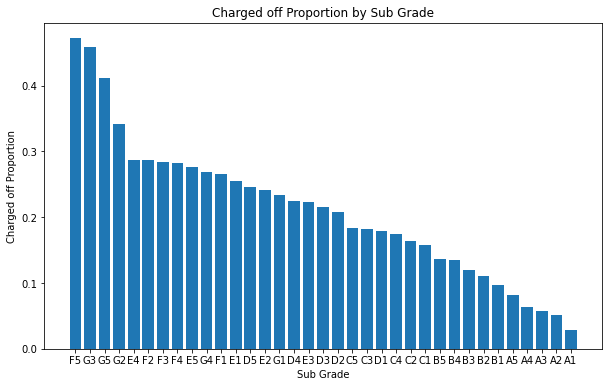

In [43]:
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(subgrade_vs_loan_sorted['sub_grade'], subgrade_vs_loan_sorted['Chargedoff_Proportion'])
plt.xlabel('Sub Grade')
plt.ylabel('Charged off Proportion')
plt.title('Charged off Proportion by Sub Grade')
plt.show()

<h3>The analysis reveals the following observations: </h3><br>
<li>"A" sub grades exhibit a significantly lower likelihood of being charged off.
<li>"F" and "G" sub grades have a considerably higher likelihood of being charged off.
<li>The proportion of charged off cases increases progressively as we move from "A" sub grades towards "G" sub grades.

#### Conducting Bi-Variate Analysis on the variable `revol_util` and `loan_status` in relation to the proportion of <i>`Charged Off`</i> accounts.

In [54]:
revolUtil_vs_loanStatus = df.groupby(['revol_util_categories', 'loan_status'])['revol_util_categories'].aggregate('count').unstack().reset_index()
revolUtil_vs_loanStatus["Total"] = revolUtil_vs_loanStatus["Charged Off"] + revolUtil_vs_loanStatus["Current"] + revolUtil_vs_loanStatus["Fully Paid"]
revolUtil_vs_loanStatus["Charged Off Proportion"] = revolUtil_vs_loanStatus["Charged Off"] / revolUtil_vs_loanStatus["Total"]
revolUtil_vs_loanStatus_sorted = revolUtil_vs_loanStatus.sort_values("Charged Off Proportion",ascending=False)

In [55]:
revolUtil_vs_loanStatus_sorted

loan_status,revol_util_categories,Charged Off,Current,Fully Paid,Total,Charged Off Proportion
1,Extremely Risky,1808,270,7628,9706,0.186277
4,Risky,1157,236,6388,7781,0.148696
3,Moderate,1014,193,6534,7741,0.130991
0,Extremely Good,283,47,2116,2446,0.115699
2,Good,813,173,7271,8257,0.098462


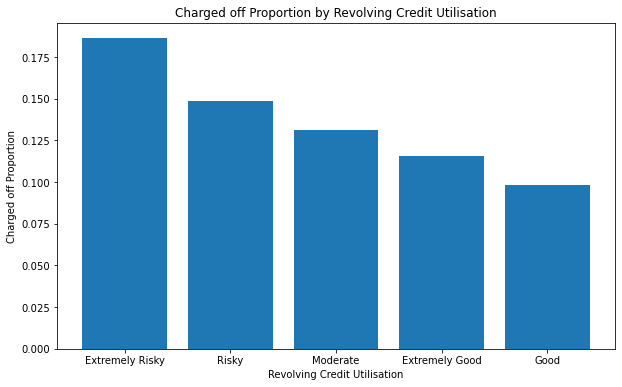

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(revolUtil_vs_loanStatus_sorted['revol_util_categories'], revolUtil_vs_loanStatus_sorted['Charged Off Proportion'])
plt.xlabel('Revolving Credit Utilisation')
plt.ylabel('Charged off Proportion')
plt.title('Charged off Proportion by Revolving Credit Utilisation')
plt.show()

#### The analysis provides the following insights:
-  Those accounts whose revolving credit utilisation falls under the <b>*Extremely Risky*</b> category are highly likely to be a defaulter or their loan accounts being charged off.
-  As we move from <b>*Extremely Risky*</b> to <b>*Good*</b> it can be noticied that there is less likely hood of accounts having credit utilisation under the categories <b>*Extremely Good*</b> and <b>*Good*</b> (under 30%) to be charged off.
-  An interesting insight can be seen here that borrower accounts that fall under the <b>*Extremely Good*</b> category (<b>i.e. having less than 5% revolving credit utilisation</b>) are more likely to be defaulters than accounts under <b>*Good*</b> category.

### Categories Debt-to-Income ratio column `dti`

-  The categorisation is with reference to the following article <a href='https://www.investopedia.com/terms/d/dti.asp'>DTI Guidelines</a>.
-  <b>Good:</b> Debt to Income ratio under <b>35%</b> is considered good and other banks can provide additional loans to the borrower.
-  <b>Concerned:</b> Debt to Income ratio <b>between 35% and 49%</b> is considered concerning to the banks and is advised to not provide loans of higher amount and higher EMIs to the borrower.
-  <b>Risky:</b> Debt to Income ratio <b>over 50%</b> is considered risky by banks and other lending institutions as the borrower won't be able to pay EMIs for loans having higher EMI and can lead to a default.

In [76]:
df['dti'].isnull().sum()

0

In [82]:
def DTI_Segment(x):
    x = float(x)
    if x <= 35:
        return "Good"
    elif (x > 35) & (x <= 49):
        return "Concerned"
    elif x >= 50:
        return "Risky"
    
    

In [124]:
df['dti_categorised'] = df['dti'].apply(lambda x: DTI_Segment(x))

In [198]:
dti_vs_loanStatus = df.groupby(['dti_categorised', 'loan_status'])['dti_categorised'].aggregate('count').unstack().reset_index()

In [199]:
dti_vs_loanStatus

loan_status,dti_categorised,Charged Off,Current,Fully Paid
0,Good,5627,1140,32950


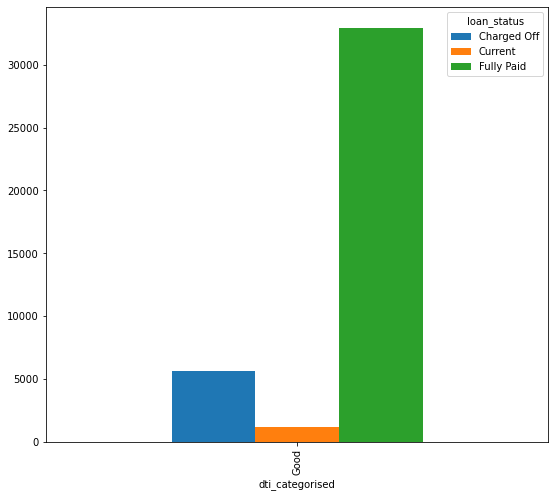

In [222]:
dti_vs_loanStatus.plot(x="dti_categorised", y=["Charged Off","Current", "Fully Paid"],kind="bar",figsize=(9, 8))
plt.show()

#### Analysis outcome of `dti` vs `loan_status` column graph
-  It is observed that the data set contains <b>Debt-to-Index</b> ratio within the <b>Good</b> category (<b>i.e. DTI ratio is under 35%</b>)
-  It can be seen that majority of borrower accounts with <b>good dti ratio</b> were able to <b>fully pay</b> the loan.
-  This also proves that there is significant difference for borrower account